# Laborator 07-08

Familia algoritmilor evolutivi este vastă, există multe versiuni cu diferite proprietăți și caracteristici. Însă, aceste metode împărtășesc aceleași principii de operare și componente comune:
- Schema de reprezentare a soluțiilor (genotip, fenotip, etc.)
- Operatori de încrucișare, bazate pe principiul [eredității](https://ro.wikipedia.org/wiki/Ereditate) (ex. crossover)
- Operatori de [mutație](https://ro.wikipedia.org/wiki/Muta%C8%9Bie_genetic%C4%83), perturbare a soluțiilor (ex. bit-flipping)
- O funcție de evaluare pentru [fitness](https://en.wikipedia.org/wiki/Fitness_function)
- O strategia de selecție (ex. selecția tip ruletă, selecția tunir etc.)
- Strategia de evoluție (ex. rata de mutație, încrucișare etc.)

## Distributed Evolutionary Algorithms in Python (DEAP)

[DEAP](https://github.com/DEAP/deap) este o librărie python ce facilitează implementarea algoritmilor evolutivi. Ea oferă o modalitate simplificată și organizată pentru definirea diferitelor componente mai sus amintite. 

DEAP oferă numeroase componente predefinite (variațiile cele mai des folosite, descrise în literatura de specialitatee), totodată oferind și o suficientă flexibilitate, opțiuni pentru definirea propriilor variații, modificări a acestoor componente (pentru probleme pentru care componentele predefinite nu sunt suficiente).

## Instalarea pe mașina  viruală Colab

Folosim comanda `pip install`:

In [1]:
!pip install deap

     |████████████████████████████████| 163kB 7.5MB/s 


## Importarea componentelor principale 

In [2]:
from deap import algorithms
from deap import base
from deap import creator
from deap import tools

# Exemplu de utlizare 

Vom utiliza o metodă ES pentru a găsi coeficienții unei funcții polinomiale (presuspus necunoscută -  pentru un input, putem observa doar o valoare evaluată perturbată de zgomot).



In [3]:
import numpy as np
import random

def groundTruth(x):
  return 1.42*x + 2.84*x**2 - 0.2*x**3 + 4.2

In [32]:
# ieșirea este perturbată de zgomot
def sample(inputs):
    return np.array([groundTruth(inp) + np.random.normal(0.5) for inp in inputs])

In [33]:
# efectul zgomotului aditiv - input constant, rezultate diferite
for i in range(0, 10):
  print(sample([1]))

[8.96403758]
[6.9119948]
[7.72642935]
[8.01435832]
[9.2356553]
[8.25671184]
[7.52776649]
[8.36014082]
[9.38379069]
[6.33249182]


Pentru a modela, optimiza un proces folosind un algoritm evolutiv, trebuie să definim ce tip de model căutăm. Pentru exemplul actual, vom presupune că știm că modelul pe care îl căutăm este un polinom de cel mult gradul 4 (în exemplul concret este de gradul 3, astfel algoritmul evolutiv va trebui să determine coeficienții peentru termenii $x^k$ unde $k>3$  ca fiind egali cu 0 ). 

In [34]:
# o solutie va fi reprezentata de 5 numere reale ([a1, a2, a3, a4, c]): a1*x + a2*x^2 + a3*x^3 + a4*x^4 + c
IND_SIZE = 4

Într-un prim pas, definim reprezenatrea soluțiilor, strategia de selecție și funcția fitness.

In [35]:
import array
# dorim să minimizăm funcția
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# reprezenatre - un șir (array) de numere reale (double)
creator.create("Individual", array.array, typecode="d", fitness=creator.FitnessMin, strategy=None)
creator.create("Strategy", array.array, typecode="d")

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Strategy' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


În pasul următor, de obicei definim funcțiile ce facilitează utilizarea reprezentării alese pentru a genera indivizi (în algpritmul evolutiv) și a forma o populație. Pentru acest scop DEAP oferă un "utilitar", denumit `toolbox`.

In [36]:
def generateES(individual, strategy, size):
    ind = individual(np.random.normal() for _ in range(size))
    ind.strategy = strategy(np.random.normal() for _ in range(size))
    return ind

toolbox = base.Toolbox()

# functii pt. generarea indivizilor si a populatiei
toolbox.register("individual", generateES, creator.Individual, creator.Strategy, IND_SIZE)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

Funcția fitness va măsura eroarea, determinată empiric, pentru o soluție propusă (individ). 

In [37]:
data = [(0,0)]
for i in np.linspace(-5, 5, 100):
  data.append( (i, i) )
print(data)

[(0, 0), (-5.0, -5.0), (-4.898989898989899, -4.898989898989899), (-4.797979797979798, -4.797979797979798), (-4.696969696969697, -4.696969696969697), (-4.595959595959596, -4.595959595959596), (-4.494949494949495, -4.494949494949495), (-4.393939393939394, -4.393939393939394), (-4.292929292929293, -4.292929292929293), (-4.191919191919192, -4.191919191919192), (-4.090909090909091, -4.090909090909091), (-3.9898989898989896, -3.9898989898989896), (-3.888888888888889, -3.888888888888889), (-3.787878787878788, -3.787878787878788), (-3.686868686868687, -3.686868686868687), (-3.5858585858585856, -3.5858585858585856), (-3.484848484848485, -3.484848484848485), (-3.383838383838384, -3.383838383838384), (-3.282828282828283, -3.282828282828283), (-3.1818181818181817, -3.1818181818181817), (-3.080808080808081, -3.080808080808081), (-2.9797979797979797, -2.9797979797979797), (-2.878787878787879, -2.878787878787879), (-2.7777777777777777, -2.7777777777777777), (-2.676767676767677, -2.676767676767677), (

In [38]:
def evaluatePolynomial(ind, x): 
    y = 0.0    
    for i in range(1,IND_SIZE):
        y += ind[i-1]*x**i
    y += ind[IND_SIZE-1]
       
    return y

def fitness(ind, data):
    # mean square error
    mse = 0.0
    for x, y in data:
      val = evaluatePolynomial(ind, x)
      err  = y - val
      mse += err**2
        
    return mse/len(data),

toolbox.register("evaluate", fitness, data=data)

Parametrizăm algoritmul, spețificând operatorii predefiniți pe care dorim să îi foolosim: https://deap.readthedocs.io/en/master/api/algo.html

In [39]:
# parametrii pt. alg algorithms.eaMuCommaLambda
toolbox.register("mate", tools.cxESBlend, alpha=0.1)
toolbox.register("mutate", tools.mutESLogNormal, c=1.0, indpb=0.3)
toolbox.register("select", tools.selTournament, tournsize=4)

Cu ajutorul modului `Statistics` putem genera statisticile (și afișsa) aferente prodesului de optimizare.

In [40]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

# reținem cele mai bune 10 soluții
hof = tools.HallOfFame(10)

In [17]:
pop = toolbox.population(n=100)

pop, logbook = algorithms.eaMuCommaLambda(pop, toolbox, mu=100, lambda_=200, 
            cxpb=0.6, mutpb=0.2, ngen=1000, stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg    	std    	min    	max   
0  	100   	53923.6	72075.1	272.826	421765
1  	163   	8579.37	9802.9 	301.903	46864.4
2  	163   	1924.88	3167.87	107.247	25530.6
3  	158   	481.834	465.748	15.302 	2574.35
4  	158   	98.3198	90.879 	8.19115	421.069
5  	162   	31.7133	22.6953	6.39638	109.615
6  	161   	14.1543	7.11008	4.872  	35.0258
7  	164   	8.16052	3.22174	2.40866	18.7851
8  	163   	5.55714	1.79401	2.51788	10.0598
9  	162   	4.52151	1.3862 	2.51788	9.7002 
10 	155   	3.76802	1.05831	1.79668	6.13685
11 	162   	3.24115	1.25667	1.79668	13.2158
12 	152   	2.67375	0.636279	1.79668	5.81475
13 	166   	2.57935	2.38903 	1.38529	24.0747
14 	167   	1.88509	0.351601	1.12286	2.56812
15 	166   	1.70838	0.417937	1.12286	4.73419
16 	159   	1.43775	0.264382	1.00912	2.18326
17 	156   	1.25304	0.158962	0.922135	1.83472
18 	164   	1.17404	0.264156	0.922135	3.57034
19 	165   	1.09559	0.07129 	0.922135	1.29466
20 	161   	1.04802	0.0409313	0.922135	1.17698
21 	163   	1.02308	0.020686 	0.950323	1.09

Afișsarea celor mai bune soluții:

In [18]:
for h in hof:
  print('Solution [a1={}, a2={}, a3={}, a4={}, c={}]  has fitness {}'.format(h[0], h[1], h[2], h[3], h[4], h.fitness))

Solution [a1=0.9890548656833853, a2=0.025340555241160006, a3=0.0006841060048765499, a4=-0.001130402437744431, c=-0.07194165343774397]  has fitness (0.003364081410148115,)
Solution [a1=0.9892992924132142, a2=0.025416877980358805, a3=0.0006841060203864288, a4=-0.001130402437744431, c=-0.07194165343774397]  has fitness (0.003364366527481918,)
Solution [a1=0.9890663650090382, a2=0.02537801752678069, a3=0.0006841060004061435, a4=-0.001130402437744431, c=-0.07194165343774396]  has fitness (0.0033646603691821994,)
Solution [a1=0.989002613710886, a2=0.02536604371003734, a3=0.0006841060172992716, a4=-0.001130402437744431, c=-0.07194165343774397]  has fitness (0.003364941313046772,)
Solution [a1=0.9890606114862487, a2=0.025395861640401023, a3=0.0006841060095292796, a4=-0.001130402437744431, c=-0.07194165343774397]  has fitness (0.003365152195065033,)
Solution [a1=0.9892748318750236, a2=0.02543650479307051, a3=0.0006841060152905876, a4=-0.001130402437744431, c=-0.07194165343774397]  has fitness (

# Exerciții

1. Comparați grafic soluțiile cele mai bune cu soluția optimă (funcția `groundTruth`) pe intervalul $[-5, 5]$.
2. Cum este afectat convergența metodei, calitatea soluțiilor, dacă:
  - Probabilitatea de mutație (`mutpb`) este (mult) redusă;
  - Amplitudinea zgomotului aditiv este (mult) mai mare;
  - Modelul utilizat este mai exact, gradul polinomului căutat este maximum 3 (`IND_SIZE = 4`).
3. Importați [acest](https://github.com/DEAP/notebooks/blob/master/OneMax.ipynb) notebook și studiați exemplul de optimizare prezentat, pentru problema [OneMax](https://tracer.lcc.uma.es/problems/onemax/onemax.html).
4. Implementați cu ajutorul DEAP un algoritm evolutiv, ce găsește șiruri binare în care diferența absolută dintre numârul biților setate 1 și numârul biților setate 0 este minimă  (0 pntru șiruri de lungime pară, 1 pentru lungimi impare).
  ```
  f(bstring) = abs(sum(bstring==1) - sum(bstring==0))
  ```

1)

In [ ]:
#Mycode
data = [(0,0)]
for i in np.linspace(-5, 5, 100):
  data.append( (i, i) )
print(data)

# parametrii pt. alg algorithms.eaMuCommaLambda
toolbox.register("mate", tools.cxESBlend, alpha=0.1)
toolbox.register("mutate", tools.mutESLogNormal, c=1.0, indpb=0.3)
toolbox.register("select", tools.selTournament, tournsize=4)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

# reținem cele mai bune 10 soluții
hof = tools.HallOfFame(10)

pop = toolbox.population(n=100)

pop, logbook = algorithms.eaMuCommaLambda(pop, toolbox, mu=100, lambda_=200, 
            cxpb=0.6, mutpb=0.2, ngen=200, stats=stats, halloffame=hof, verbose=True)


In [21]:
import matplotlib.pyplot as plt

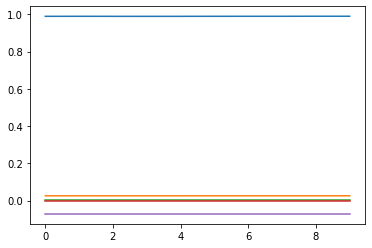

In [29]:
plt.plot(hof.items)


2)

In [41]:
pop = toolbox.population(n=100)

pop, logbook = algorithms.eaMuCommaLambda(pop, toolbox, mu=100, lambda_=200, 
            cxpb=0.6, mutpb=0.02, ngen=1000, stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg    	std    	min   	max    
0  	100   	2267.53	3166.74	4.0225	16232.7
1  	112   	277.334	318.476	2.27768	1679.72
2  	122   	47.4587	63.8182	2.27768	317.502
3  	120   	8.83358	6.86934	1.42769	39.9697
4  	126   	2.99365	1.91048	1.15403	13.6524
5  	126   	1.71474	0.516746	0.762529	3.91011
6  	114   	1.35402	0.214443	0.762529	1.95511
7  	126   	1.14542	0.162727	0.762529	1.429  
8  	124   	0.985607	0.102008	0.762529	1.22005
9  	127   	0.894652	0.0598382	0.783276	1.01583
10 	125   	0.842321	0.0422349	0.783276	0.927303
11 	124   	0.79725 	0.0228142	0.775438	0.86902 
12 	129   	0.781933	0.0034432	0.772825	0.794045
13 	120   	0.778772	0.00253451	0.769947	0.783521
14 	120   	0.775298	0.00235407	0.769175	0.780072
15 	122   	0.772373	0.00194104	0.768694	0.777376
16 	129   	0.770035	0.00130741	0.768317	0.773266
17 	131   	0.768629	0.00082565	0.766324	0.770933
18 	135   	0.767915	0.000605858	0.765968	0.76917 
19 	121   	0.767284	0.000659905	0.765853	0.768571
20 	127   	0.766505	0.00057

In [44]:
for h in hof:
  print('Solution [a1={}, a2={}, a3={}, c={}]  has fitness {}'.format(h[0], h[1], h[2], h[3], h.fitness))

Solution [a1=0.7026957182006488, a2=-0.0008670273166792706, a3=0.01935568548859564, c=0.007298367328263701]  has fitness (0.14056814195540043,)
Solution [a1=0.7026544912595523, a2=-0.0008670273166792707, a3=0.019355685488595637, c=0.007298367328263701]  has fitness (0.14056894966410138,)
Solution [a1=0.7026353310526164, a2=-0.0008670273166792707, a3=0.019355685488595637, c=0.007298367328263701]  has fitness (0.14056933478575886,)
Solution [a1=0.7026348902971512, a2=-0.0008670273166792707, a3=0.01935568548859564, c=0.007298367328263701]  has fitness (0.1405693437176991,)
Solution [a1=0.7026348865839998, a2=-0.0008670273166792707, a3=0.01935568548859564, c=0.0072983673282637]  has fitness (0.14056934379296024,)
Solution [a1=0.7026348865807555, a2=-0.0008670273166792707, a3=0.01935568548859564, c=0.007298367328263699]  has fitness (0.14056934379302602,)
Solution [a1=0.7026348865806551, a2=-0.0008670273166792707, a3=0.01935568548859561, c=0.007298367328263698]  has fitness (0.1405693437930

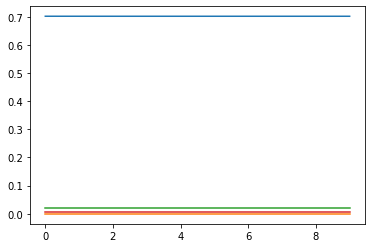

In [45]:
plt.plot(hof.items)


REZULTAT : FUNCTIA CONVERGE MAI RAPID SI AJUNGE LA O PRECIZIE MAI BUNA MAI RAPID. 

onex to 1 and 0 quals or 1 difference

In [47]:
import random
from deap import base, creator, tools, algorithms

In [48]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [49]:
ind = creator.Individual([1, 0, 1, 1, 0])

print(ind)
print(type(ind))
print(type(ind.fitness))

[1, 0, 1, 1, 0]
<class 'deap.creator.Individual'>
<class 'deap.creator.FitnessMax'>


In [50]:
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [51]:
bit = toolbox.attr_bool()
ind = toolbox.individual()
pop = toolbox.population(n=3)

print("bit is of type %s and has value\n%s" % (type(bit), bit))
print("ind is of type %s and contains %d bits\n%s" % (type(ind), len(ind), ind))
print("pop is of type %s and contains %d individuals\n%s" % (type(pop), len(pop), pop))

bit is of type <class 'int'> and has value
1
ind is of type <class 'deap.creator.Individual'> and contains 10 bits
[0, 0, 1, 0, 0, 1, 0, 0, 0, 1]
pop is of type <class 'list'> and contains 3 individuals
[[0, 1, 1, 0, 0, 1, 0, 0, 0, 0], [1, 1, 1, 0, 0, 1, 0, 1, 0, 1], [1, 1, 0, 1, 1, 1, 0, 1, 1, 1]]


In [85]:
def evalOneMax(individual):
    return sum(individual),

In [103]:
def evalAverageDifference(stringVal):
   sumZeros=0
   sumOnes=0
   for str in stringVal:
     if str == 0 :
      sumZeros += 1
     else :
      sumOnes+=1
   return (10-(abs(sumZeros-sumOnes))),


  

In [104]:
toolbox.register("evaluate", evalAverageDifference)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.10)
toolbox.register("select", tools.selTournament, tournsize=3)

In [105]:
ind = toolbox.individual()
print(ind)
toolbox.mutate(ind)
print(ind)

[1, 1, 1, 0, 1, 1, 1, 0, 1, 1]
[0, 1, 1, 0, 1, 1, 1, 0, 1, 1]


In [106]:
mutant = toolbox.clone(ind)
print(mutant is ind)
print(mutant == ind)

False
True


In [107]:
def main():
    import numpy
    
    pop = toolbox.population(n=5000)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, stats=stats, halloffame=hof, verbose=True)
    
    return pop, logbook, hof

gen	nevals	avg  	min	max
0  	5000  	7.542	0  	10 
1  	3002  	8.5812	2  	10 
2  	2940  	8.95  	2  	10 
3  	3123  	9.0076	0  	10 
4  	3031  	9.0612	2  	10 
5  	3048  	9.0184	2  	10 
6  	3007  	9.05  	4  	10 
7  	3053  	9.0612	2  	10 
8  	2992  	9.1004	2  	10 
9  	3051  	9.0456	2  	10 
10 	2922  	9.1156	4  	10 
Best individual is: [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
with fitness: (10.0,)


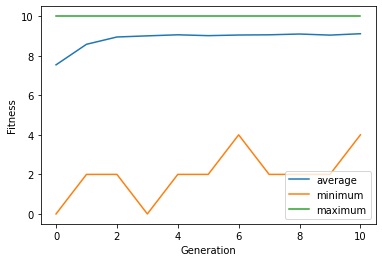

In [109]:
if __name__ == "__main__":
    pop, log, hof = main()
    print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))
    
    import matplotlib.pyplot as plt
    gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
    plt.plot(gen, avg, label="average")
    plt.plot(gen, min_, label="minimum")
    plt.plot(gen, max_, label="maximum")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend(loc="lower right")
    plt.show()